In [25]:
import numpy as np
from scipy.interpolate import interp1d
from datetime import datetime
import matplotlib.pyplot as plt

# Black-Scholes model for option pricing
class BS:
    def __init__(self, S, K, r, vol, T):
        self.S = S
        self.K = K
        self.r = r
        self.vol = vol
        self.T = T

    def cdf(self, x):
        """Cumulative distribution function for the standard normal distribution."""
        from math import erf, sqrt
        return 0.5 * (1 + erf(x / sqrt(2)))

    def d1(self):
        from math import log, sqrt
        return (log(self.S / self.K) + (self.r + 0.5 * self.vol**2) * self.T) / (self.vol * sqrt(self.T))

    def d2(self, d1):
        from math import sqrt
        return d1 - self.vol * sqrt(self.T)

    def call_price(self, d1, d2):
        from math import exp
        return self.S * self.cdf(d1) - self.K * exp(-self.r * self.T) * self.cdf(d2)

    def put_price(self, d1, d2):
        from math import exp
        return self.K * exp(-self.r * self.T) * self.cdf(-d2) - self.S * self.cdf(-d1)

    def straddle_price(self):
        d1 = self.d1()
        d2 = self.d2(d1)
        return self.call_price(d1, d2) + self.put_price(d1, d2)

# Given parameters
S = 126
r = 0.05004
T = (datetime(2024, 12, 20) - datetime(2024, 8, 27)).days / 365

# Implied volatility and strikes
strike_percentages = [0.80, 0.90, 0.95, 0.975, 1.00, 1.025, 1.05, 1.10, 1.20]
implied_vols = [0.6002, 0.5893, 0.5885, 0.5883, 0.5885, 0.5886, 0.5887, 0.5885, 0.5886]
strikes = np.array(strike_percentages) * S
vol_surface = interp1d(strikes, implied_vols, kind='linear', fill_value='extrapolate')

# Calculate break-even points and payoffs
for K in np.arange(0.95 * S, 1.05 * S + 1, 1):
    vol = vol_surface(K)
    bs = BS(S, K, r, vol, T)
    straddle_price = bs.straddle_price()
    break_even_high = K + straddle_price
    break_even_low = K - straddle_price

    # Output results
    print(f"Strike: {K}, Straddle Price: {straddle_price:.2f}, Break-Even High: {break_even_high:.2f}, Break-Even Low: {break_even_low:.2f}")


Strike: 119.69999999999999, Straddle Price: 32.64, Break-Even High: 152.34, Break-Even Low: 87.06
Strike: 120.69999999999999, Straddle Price: 32.61, Break-Even High: 153.31, Break-Even Low: 88.09
Strike: 121.69999999999999, Straddle Price: 32.61, Break-Even High: 154.31, Break-Even Low: 89.09
Strike: 122.69999999999999, Straddle Price: 32.63, Break-Even High: 155.33, Break-Even Low: 90.07
Strike: 123.69999999999999, Straddle Price: 32.67, Break-Even High: 156.37, Break-Even Low: 91.03
Strike: 124.69999999999999, Straddle Price: 32.73, Break-Even High: 157.43, Break-Even Low: 91.97
Strike: 125.69999999999999, Straddle Price: 32.81, Break-Even High: 158.51, Break-Even Low: 92.89
Strike: 126.69999999999999, Straddle Price: 32.91, Break-Even High: 159.61, Break-Even Low: 93.79
Strike: 127.69999999999999, Straddle Price: 33.02, Break-Even High: 160.72, Break-Even Low: 94.68
Strike: 128.7, Straddle Price: 33.16, Break-Even High: 161.86, Break-Even Low: 95.54
Strike: 129.7, Straddle Price: 33

Strike: 119.69999999999999, Straddle Price: 32.64, Break-Even High: 152.34, Break-Even Low: 87.06
Strike: 120.69999999999999, Straddle Price: 32.61, Break-Even High: 153.31, Break-Even Low: 88.09
Strike: 121.69999999999999, Straddle Price: 32.61, Break-Even High: 154.31, Break-Even Low: 89.09
Strike: 122.69999999999999, Straddle Price: 32.63, Break-Even High: 155.33, Break-Even Low: 90.07
Strike: 123.69999999999999, Straddle Price: 32.67, Break-Even High: 156.37, Break-Even Low: 91.03
Strike: 124.69999999999999, Straddle Price: 32.73, Break-Even High: 157.43, Break-Even Low: 91.97
Strike: 125.69999999999999, Straddle Price: 32.81, Break-Even High: 158.51, Break-Even Low: 92.89
Strike: 126.69999999999999, Straddle Price: 32.91, Break-Even High: 159.61, Break-Even Low: 93.79
Strike: 127.69999999999999, Straddle Price: 33.02, Break-Even High: 160.72, Break-Even Low: 94.68
Strike: 128.7, Straddle Price: 33.16, Break-Even High: 161.86, Break-Even Low: 95.54
Strike: 129.7, Straddle Price: 33

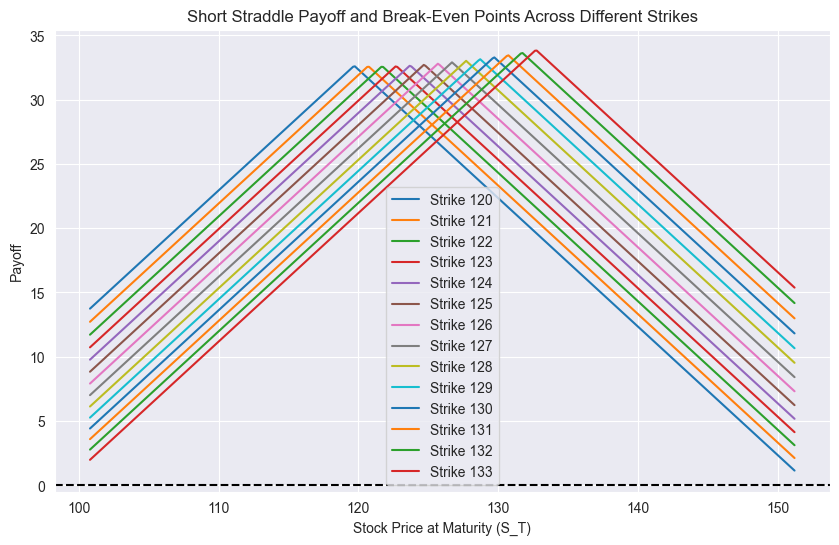

In [27]:
# Calculate break-even points and display results
fig, ax = plt.subplots(figsize=(10, 6))
S_T = np.linspace(0.8 * S, 1.2 * S, 400)  # Stock prices at maturity for plotting

for K in np.arange(0.95 * S, 1.05 * S + 1, 1):
    vol = vol_surface(K)
    bs = BS(S, K, r, vol, T)
    straddle_price = bs.straddle_price()
    break_even_high = K + straddle_price
    break_even_low = K - straddle_price
    
    payoffs = np.array([-abs(S_T - K) + straddle_price for S_T in S_T])
    ax.plot(S_T, payoffs, label=f'Strike {K:.0f}')

    print(f"Strike: {K}, Straddle Price: {straddle_price:.2f}, Break-Even High: {break_even_high:.2f}, Break-Even Low: {break_even_low:.2f}")

ax.set_title('Short Straddle Payoff and Break-Even Points Across Different Strikes')
ax.set_xlabel('Stock Price at Maturity (S_T)')
ax.set_ylabel('Payoff')
ax.axhline(0, color='black', linestyle='--')
ax.legend()
plt.grid(True)
plt.show()